##   House Price Prediction using Linear Regression

Objective: To predict the house prices using different features by fitting multiple linear regression model.

Assumptions Of Linear regression model:
- Linear relationship between dependent and independent variable
- No Multicolinearity between independent variables
- Normality of errors
- No autocorrelation between errors
- Homoscedasticity should be present

#### Importing Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

#### Loading Train and Test data

In [2]:
df_train = pd.read_csv('linear_regression_train.csv')
df_test = pd.read_csv('linear_regression_test.csv')

In [3]:
df_train.isna().sum()

LotFrontage              0
LotArea                  0
YearBuilt                0
YearRemodAdd             0
MasVnrArea               0
BsmtFinSF1               0
BsmtFinSF2               0
BsmtUnfSF                0
TotalBsmtSF              0
2ndFlrSF                 0
LowQualFinSF             0
GrLivArea                0
BsmtFullBath             0
BsmtHalfBath             0
FullBath                 0
HalfBath                 0
BedroomAbvGr             0
KitchenAbvGr             0
Fireplaces               0
GarageYrBlt              0
GarageCars               0
WoodDeckSF               0
OpenPorchSF              0
EnclosedPorch            0
3SsnPorch                0
ScreenPorch              0
PoolArea                 0
MiscVal                  0
MoSold                   0
YrSold                   0
GarageType_2Types        0
GarageType_Attchd        0
GarageType_Basment       0
GarageType_BuiltIn       0
GarageType_CarPort       0
GarageType_Detchd        0
SaleCondition_Abnorml    0
S

In [4]:
df_test.isna().sum()

LotFrontage              0
LotArea                  0
YearBuilt                0
YearRemodAdd             0
MasVnrArea               0
BsmtFinSF1               0
BsmtFinSF2               0
BsmtUnfSF                0
TotalBsmtSF              0
2ndFlrSF                 0
LowQualFinSF             0
GrLivArea                0
BsmtFullBath             0
BsmtHalfBath             0
FullBath                 0
HalfBath                 0
BedroomAbvGr             0
KitchenAbvGr             0
Fireplaces               0
GarageYrBlt              0
GarageCars               0
WoodDeckSF               0
OpenPorchSF              0
EnclosedPorch            0
3SsnPorch                0
ScreenPorch              0
PoolArea                 0
MiscVal                  0
MoSold                   0
YrSold                   0
GarageType_2Types        0
GarageType_Attchd        0
GarageType_Basment       0
GarageType_BuiltIn       0
GarageType_CarPort       0
GarageType_Detchd        0
SaleCondition_Abnorml    0
S

In [5]:
features = list(df_train.drop(columns = 'LogSalePrice').columns)

In [6]:
X_train = pd.DataFrame(df_train[features])
y_train = pd.DataFrame(df_train['LogSalePrice'])
X_test = pd.DataFrame(df_test[features])
y_test = pd.DataFrame(df_test['LogSalePrice'])

#### Data Preprocessing

In [7]:
scale_features = set(features) - set([ 'GarageType_2Types', 'GarageType_Attchd', 'GarageType_Basment',
 'GarageType_BuiltIn', 'GarageType_CarPort', 'GarageType_Detchd', 'SaleCondition_Abnorml',
 'SaleCondition_AdjLand', 'SaleCondition_Alloca', 'SaleCondition_Family', 'SaleCondition_Normal',
 'SaleCondition_Partial'])

In [8]:
from sklearn.preprocessing import RobustScaler
rs = RobustScaler()
rs.fit(X_train[scale_features])    
X_train = rs.transform(X_train[scale_features])
X_test = rs.transform(X_test[scale_features])

#### Model fitting

In [9]:
from sklearn.linear_model import LinearRegression

lr = LinearRegression()
lr.fit(X_train, y_train)

LinearRegression()

In [10]:
lr_score = lr.score(X_test, y_test) 
print("r_sqr: ", lr_score)

r_sqr:  0.835260841662237


In [11]:
y_test_pred = lr.predict(X_test)
y_test_pred

array([[12.2313391 ],
       [12.28313879],
       [12.1464138 ],
       ...,
       [11.80869761],
       [11.91590374],
       [11.52882309]])

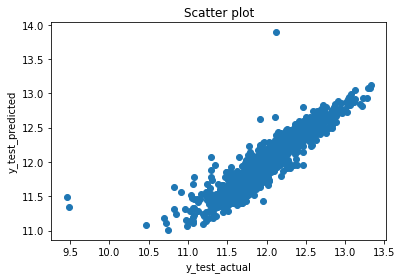

In [12]:
plt.scatter(y_test,y_test_pred)
plt.xlabel('y_test_actual')
plt.ylabel('y_test_predicted')
plt.title('Scatter plot')
plt.show()

### Assumption Checking

#### 1. Linearity

In [13]:
df=pd.DataFrame(X_train).join(y_train)
df.head()

,0,1,2,3,4,5,6,7,8,9,...,21,22,23,24,25,26,27,28,29,LogSalePrice
0,0.0,0.0,0.0,0.0,0.0,0.000000,-0.269618,1.0,0.000000,0.0,...,0.0,0.243243,0.0,1.032280,-0.902917,-1.333333,-1.0,-0.203755,-0.264542,12.247694
1,0.0,0.0,0.0,0.0,0.0,1.111220,0.547284,0.0,0.693147,-0.5,...,0.0,-0.486486,0.0,0.000000,-0.407882,-0.333333,0.0,0.367662,0.033306,12.109011
2,0.0,0.0,0.0,0.0,0.0,0.000000,-0.140845,1.0,0.000000,0.0,...,0.0,0.216216,0.0,0.995263,-0.078339,1.000000,0.0,-0.079725,0.403541,12.317167
3,0.0,-1.0,0.0,1.0,0.0,0.000000,-0.470825,0.0,0.000000,-1.0,...,0.0,-0.648649,0.0,0.000000,0.091611,-1.333333,0.0,-0.423569,0.021116,11.849398
4,0.0,0.0,1.0,1.0,0.0,1.025886,0.311871,1.0,0.000000,0.0,...,0.0,0.162162,0.0,1.145134,0.016036,2.000000,0.0,0.502156,0.956996,12.429216


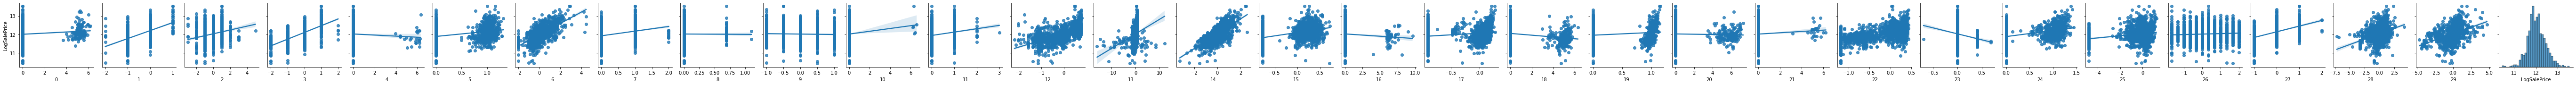

In [14]:
sns.pairplot(df,x_vars=df.columns,y_vars='LogSalePrice',diag_kind='hist',kind='reg')

In [15]:
def linearity(df):
    fig, ax = plt.subplots(10, 3, figsize=(20, 30))
    
    for i in df.columns:
        ax=plt.plot(i,df['LogSalePrice'])
        plt.tight_layout()

#### 2. Multicollinearity

In [16]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif=[]
for i in range(pd.DataFrame(X_train).shape[1]):
    vif.append(variance_inflation_factor(pd.DataFrame(X_train),i))

In [17]:
f=pd.DataFrame({'vif':vif}).T

In [18]:
f.transpose()

,vif
0,1.181845
1,4.459689
2,1.919630
3,2.240007
4,1.126618
5,2.188440
6,3.656558
7,3.420780
8,1.180014
9,1.072816


If vif value is less than 5 then we can see that there the no multicollinearity. In our features vif is less than 5 except for 2 features but it is close to 5.

Also using heatmap we can find if there is high correlation between the features

<AxesSubplot:>

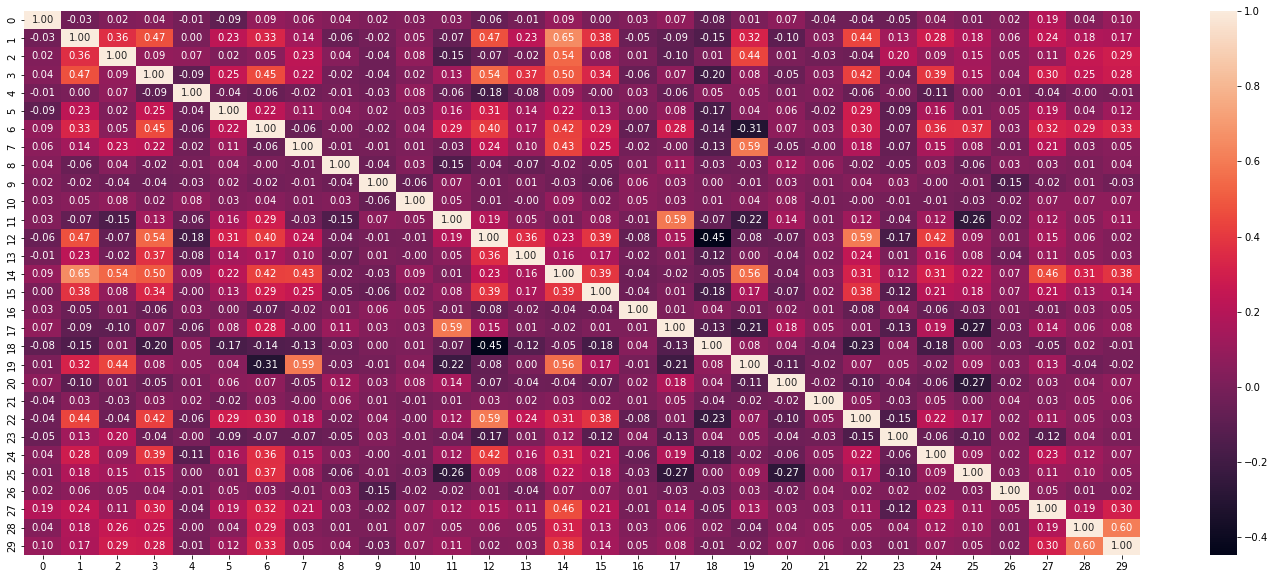

In [19]:
plt.figure(figsize=(25,10))
sns.heatmap(pd.DataFrame(X_train).corr(), annot=True, fmt='.2f')

#### 3.Normality of Errors

In [20]:
error=y_test-y_test_pred
error

,LogSalePrice
0,-0.456049
1,-0.331958
2,-0.363461
3,-0.046515
4,0.228049
...,...
1454,0.007435
1455,0.152553
1456,0.090238
1457,-0.008237


In [21]:
error.describe()

,LogSalePrice
count,1459.000000
mean,0.004483
std,0.168970
min,-2.035318
25%,-0.065559
50%,0.015433
75%,0.095609
max,0.527291


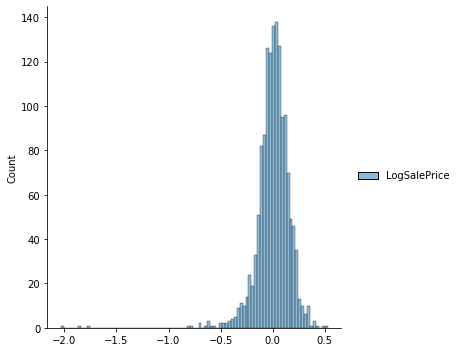

In [22]:
sns.displot(error)

#### 4. Homoscedasticity 

In [23]:
y_test_pred_df=pd.DataFrame(y_test_pred)
y_test_pred_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1459 entries, 0 to 1458
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   0       1459 non-null   float64
dtypes: float64(1)
memory usage: 11.5 KB


In [24]:
error.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1459 entries, 0 to 1458
Data columns (total 1 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   LogSalePrice  1459 non-null   float64
dtypes: float64(1)
memory usage: 11.5 KB


E:\Anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
E:\Anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


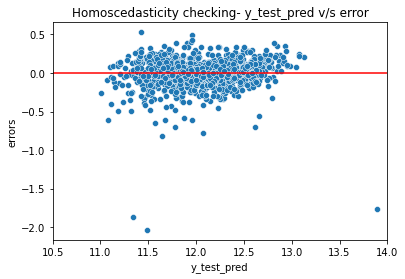

In [25]:
p=sns.scatterplot(y_test_pred_df[0],error['LogSalePrice'])
plt.xlabel('y_test_pred')
plt.ylabel('errors')
plt.xlim(10.5,14)
p=sns.lineplot([0,14],[0,0],color='r')
p=plt.title('Homoscedasticity checking- y_test_pred v/s error')

#### 5. Autocorrelation of errors

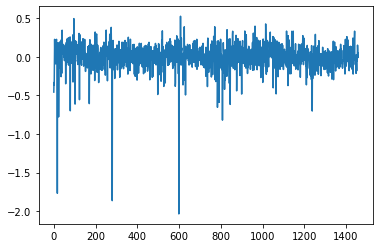

In [26]:
plt.plot(error)

In [27]:
# Durbin watson test for checking autocorrelation between errors
# Ho: There is no autocorrelation between erreos
#                v/s
# H1: There in autocorrelation between erreos

from statsmodels.stats.stattools import durbin_watson
dw_autocorr=durbin_watson(error['LogSalePrice'])
dw_autocorr

1.952260799352706

- If test statistic is between 1.5 and 2.5 then there is no autocorrelation
- If test statistic > 2.5 then there is negative autocorrelation
- If test statistic < 1.5 then there is positive autocorrelation

The all assumptions holds for our model. so we can use the model for prediction purpose.